In [391]:
import fbprophet

In [392]:
path = r"D:\Asus\Documents\archive\AAPL.csv"

In [393]:
import pandas as pd

In [394]:
from fbprophet import Prophet

In [395]:
file= pd.read_csv(path, date_parser='Date')

In [396]:
file.set_index('Date', inplace=True)

In [397]:
file.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-19,267.899994,268.000000,265.390015,266.290009,266.290009,19041800.0
2019-11-20,265.540009,266.079987,260.399994,263.190002,263.190002,26558600.0
2019-11-21,263.690002,264.010010,261.179993,262.010010,262.010010,30348800.0
2019-11-22,262.589996,263.179993,260.839996,261.779999,261.779999,16331300.0
2019-11-25,262.709991,266.440002,262.519989,266.369995,266.369995,21005100.0


In [398]:
file.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,9822.0,3.035006e+01,5.344302e+01,0.198661,1.062500e+00,1.709286e+00,3.039393e+01,2.679000e+02
High,9822.0,3.064063e+01,5.390836e+01,0.198661,1.085357e+00,1.742366e+00,3.055571e+01,2.680000e+02
Low,9822.0,3.004830e+01,5.298366e+01,0.196429,1.043571e+00,1.671429e+00,2.986536e+01,2.653900e+02
Close,9822.0,3.035294e+01,5.346427e+01,0.196429,1.066964e+00,1.712857e+00,3.023321e+01,2.671000e+02
Adj Close,9822.0,2.836403e+01,5.160359e+01,0.156008,9.140892e-01,1.452872e+00,2.630595e+01,2.671000e+02
Volume,9822.0,8.620720e+07,8.623138e+07,347200.000000,3.318138e+07,5.798940e+07,1.076320e+08,1.855410e+09


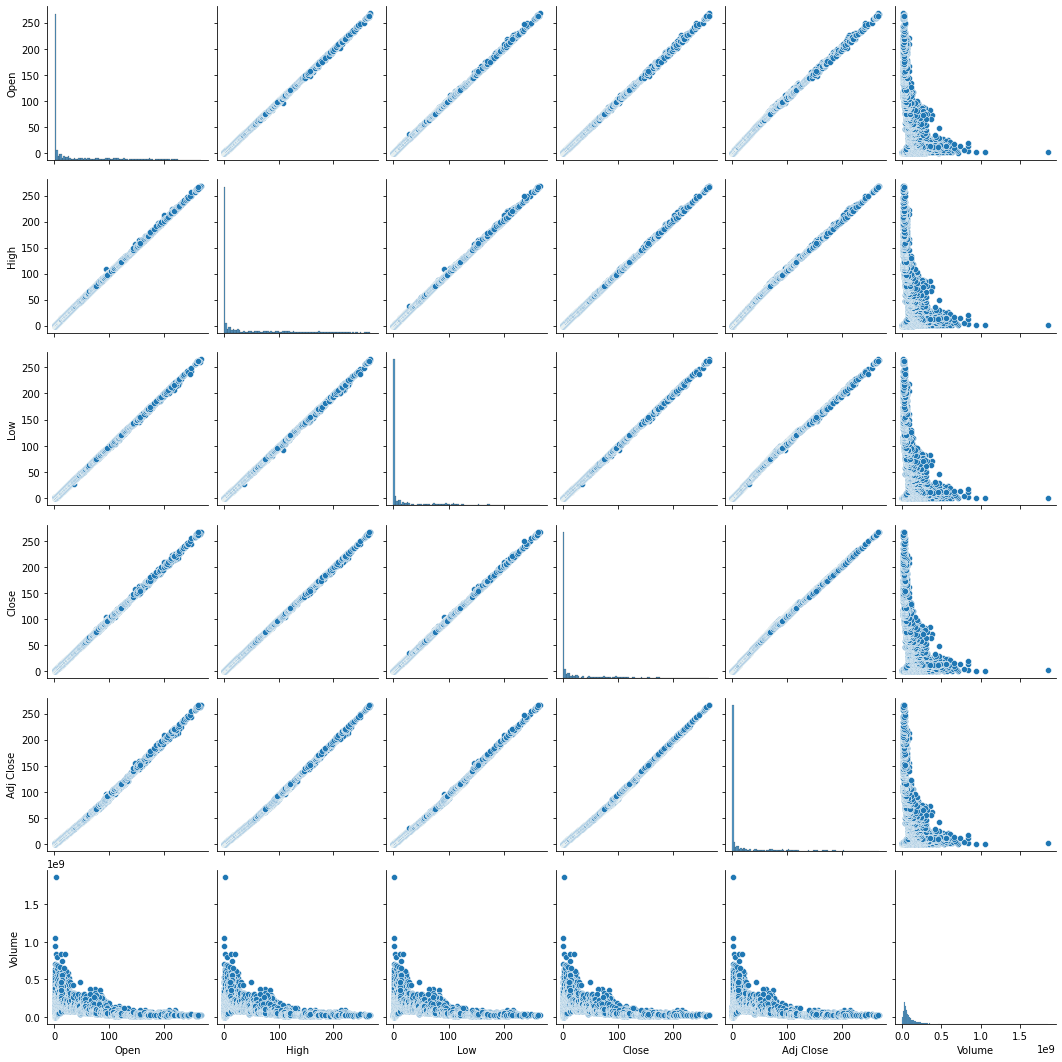

In [399]:
import seaborn as sns
sns.pairplot(file)

In [400]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9823 entries, 1980-12-12 to 2019-11-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       9822 non-null   float64
 1   High       9822 non-null   float64
 2   Low        9822 non-null   float64
 3   Close      9822 non-null   float64
 4   Adj Close  9822 non-null   float64
 5   Volume     9822 non-null   float64
dtypes: float64(6)
memory usage: 537.2+ KB


In [401]:
file.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [402]:
file.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis= 1, inplace=True)

In [403]:
file.set_index(pd.to_datetime(file.index),inplace=True)

In [404]:
f2=file.resample("M").mean()

In [405]:
import matplotlib.pyplot as plt

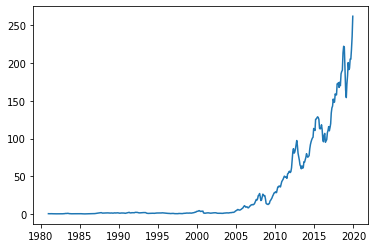

In [406]:
plt.plot(f2['Close'])

In [407]:
file['Close'].quantile(0.5)

1.712857

C:\Users\Asus\anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Close'>

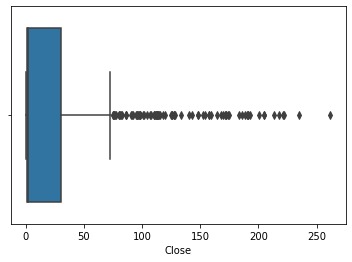

In [408]:
sns.boxplot(f2['Close'])

In [409]:
f2['Close'].min()

0.22927280952380952

In [410]:
# f2[(f2['Close']>(f2['Close'].quantile(0.75)-f2['Close'].quantile(0.25))*1.5) | (f2['Close']<(f2['Close'].quantile(0.75)-f2['Close'].quantile(0.25))*1.5)]

In [411]:
iqr_1_5=(f2['Close'].quantile(0.75)-f2['Close'].quantile(0.25))*1.5

In [412]:
outliers=f2[(f2['Close']>f2['Close'].quantile(0.75)+iqr_1_5) | (f2['Close']<f2['Close'].quantile(0.25)-iqr_1_5)]

<AxesSubplot:xlabel='Close', ylabel='Density'>

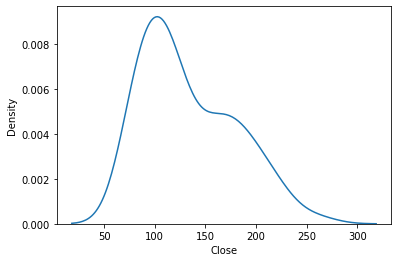

In [413]:
sns.kdeplot(outliers['Close'])

In [414]:
outliers['Close']= f2['Close'].mean() 

<ipython-input-414-88bf69606614>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['Close']= f2['Close'].mean()


In [415]:
outliers.index

DatetimeIndex(['2012-03-31', '2012-04-30', '2012-05-31', '2012-06-30',
               '2012-07-31', '2012-08-31', '2012-09-30', '2012-10-31',
               '2012-11-30', '2012-12-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
      

In [416]:
outliers.shape

(83, 1)

In [417]:
f3= f2.copy()

In [418]:
f3[(f2['Close']>f2['Close'].quantile(0.75)+iqr_1_5) | (f2['Close']<f2['Close'].quantile(0.25)-iqr_1_5)]= f2['Close'].median()

In [419]:
f3

,Close
Date,
1980-12-31,0.543613
1981-01-31,0.565264
1981-02-28,0.471570
1981-03-31,0.443486
1981-04-30,0.486182
...,...
2019-07-31,1.686084
2019-08-31,1.686084
2019-09-30,1.686084


In [420]:
f2

,Close
Date,
1980-12-31,0.543613
1981-01-31,0.565264
1981-02-28,0.471570
1981-03-31,0.443486
1981-04-30,0.486182
...,...
2019-07-31,205.216364
2019-08-31,204.957728
2019-09-30,217.994999


C:\Users\Asus\anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Close'>

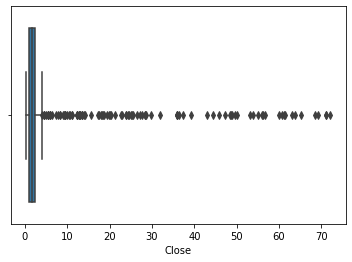

In [421]:
sns.boxplot(f3['Close'])

<AxesSubplot:xlabel='Close', ylabel='Count'>

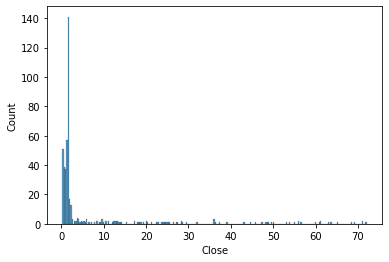

In [422]:
sns.histplot(f3['Close'])

C:\Users\Asus\anaconda31\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

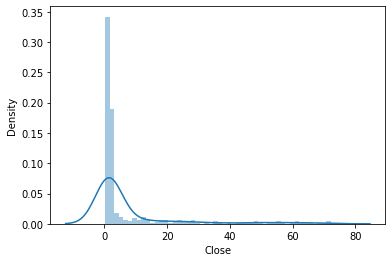

In [423]:
sns.distplot(f3['Close'])

In [424]:
import statsmodels.tsa.seasonal as sts

In [425]:
f2.isna().sum()

Close    0
dtype: int64

In [426]:
file.fillna(method='ffill',axis=1,inplace=True)

In [427]:
compo=sts.seasonal_decompose(f3)

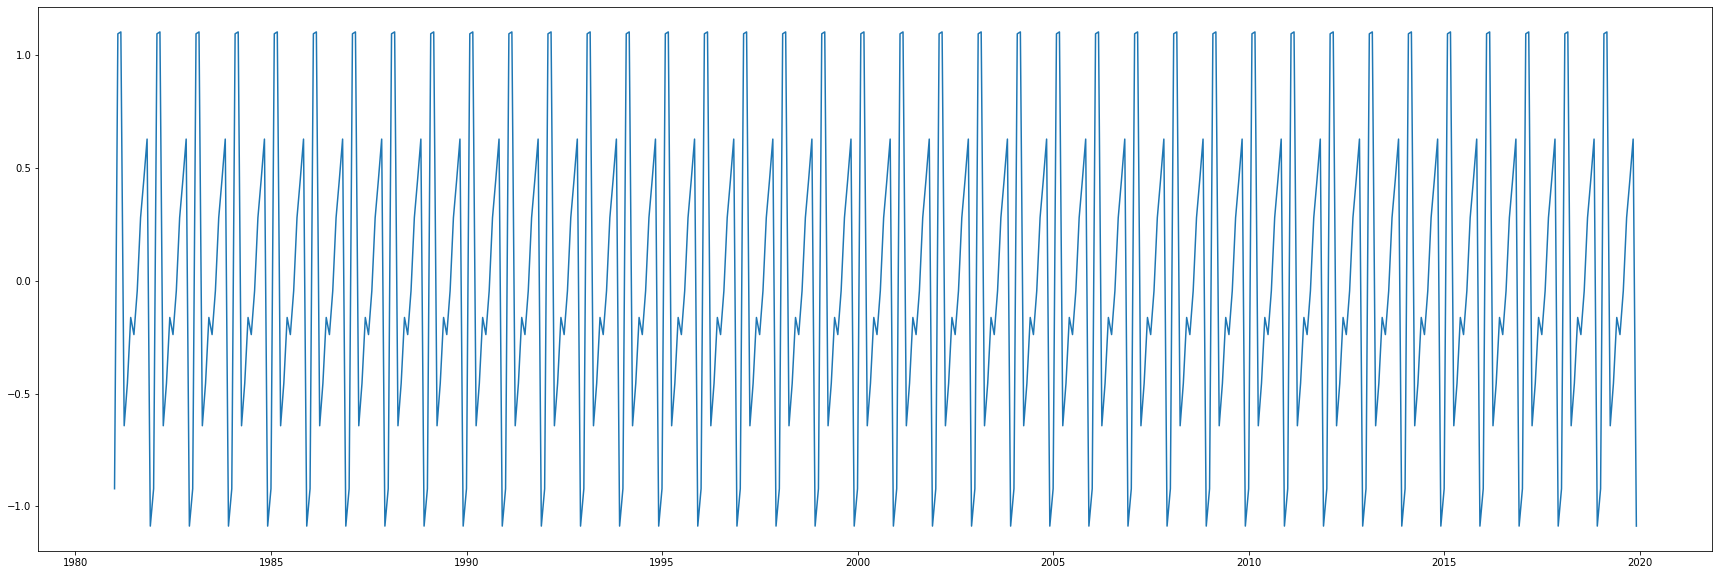

In [428]:
plt.figure(figsize=[30,10])
plt.plot(compo.seasonal)

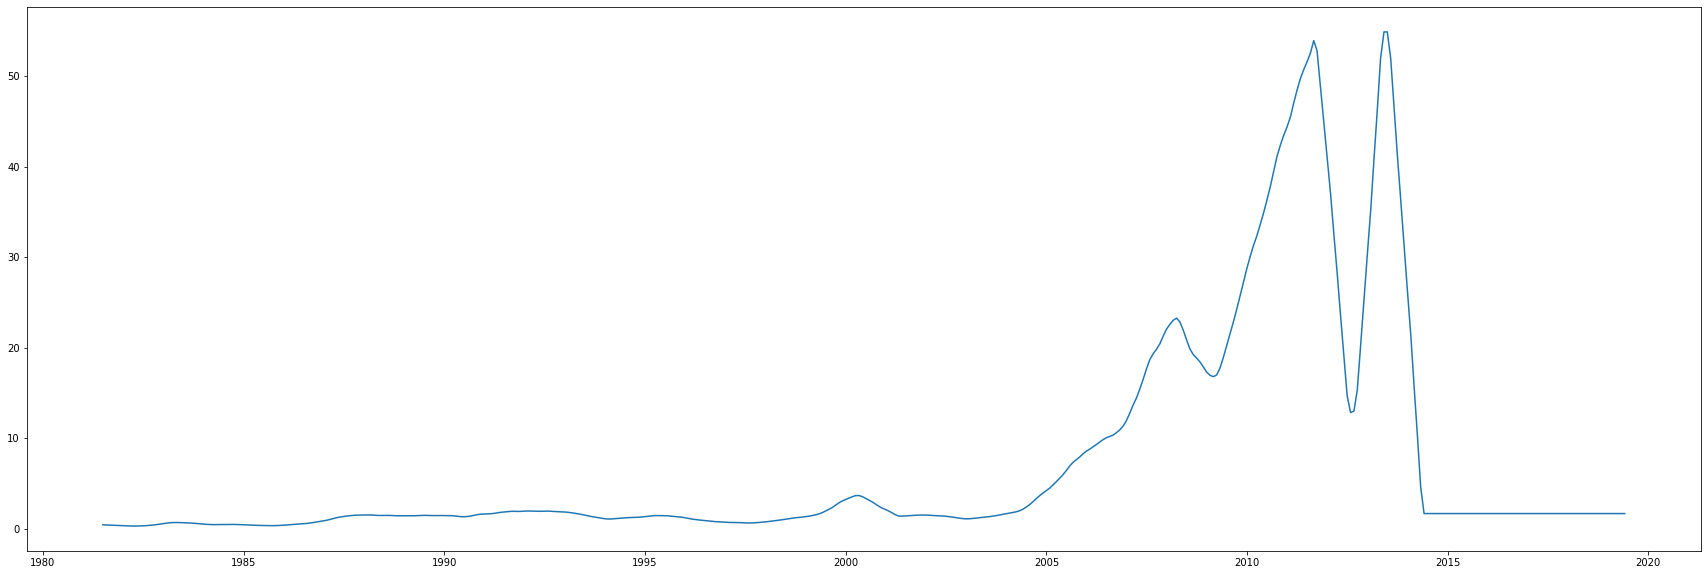

In [429]:
plt.figure(figsize=[30,10])
plt.plot(compo.trend)

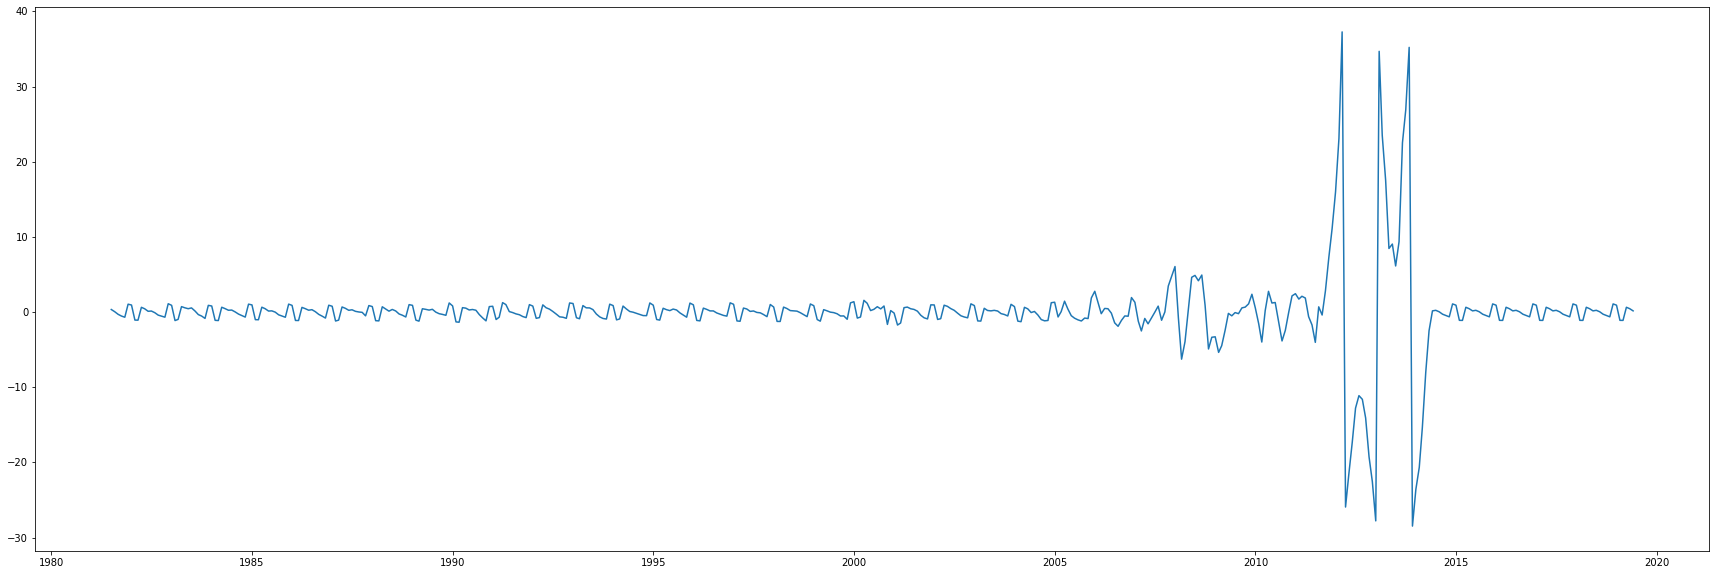

In [430]:
plt.figure(figsize=[30,10])
plt.plot(compo.resid)

In [431]:
file.isna().sum()

Close    1
dtype: int64

In [432]:
file['Close'].shape

(9823,)

In [433]:
file[file['Close'].isna()]

,Close
Date,
1981-08-10,NaN


In [434]:
file.index[12]

Timestamp('1980-12-31 00:00:00')

In [435]:
f2['Close'].rolling(12).mean()

Date
1980-12-31           NaN
1981-01-31           NaN
1981-02-28           NaN
1981-03-31           NaN
1981-04-30           NaN
                 ...    
2019-07-31    192.577545
2019-08-31    191.878515
2019-09-30    191.538625
2019-10-31    192.742030
2019-11-30    198.624496
Freq: M, Name: Close, Length: 468, dtype: float64

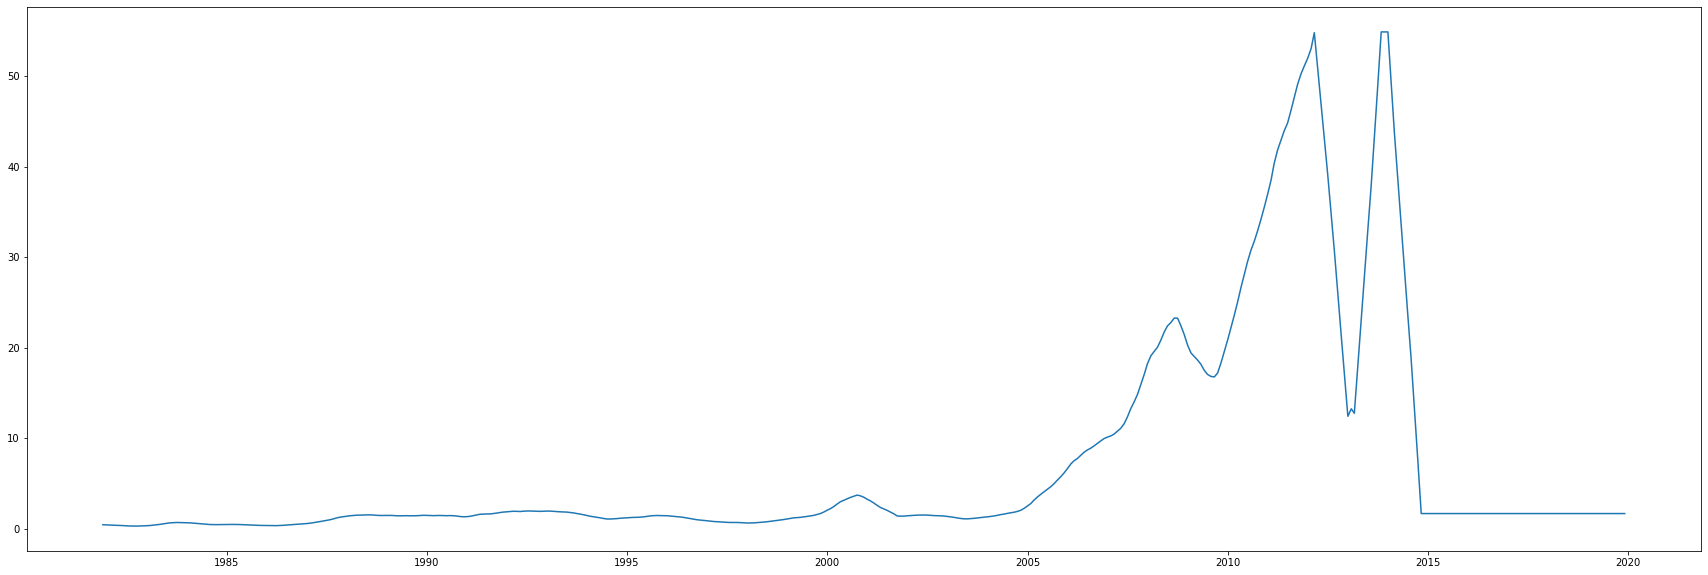

In [436]:
plt.figure(figsize=[30,10])
plt.plot(f3['Close'].rolling(12).mean())

In [437]:
f3['Close']-f3['Close'].rolling(12).mean()

Date
1980-12-31    NaN
1981-01-31    NaN
1981-02-28    NaN
1981-03-31    NaN
1981-04-30    NaN
             ... 
2019-07-31    0.0
2019-08-31    0.0
2019-09-30    0.0
2019-10-31    0.0
2019-11-30    0.0
Freq: M, Name: Close, Length: 468, dtype: float64

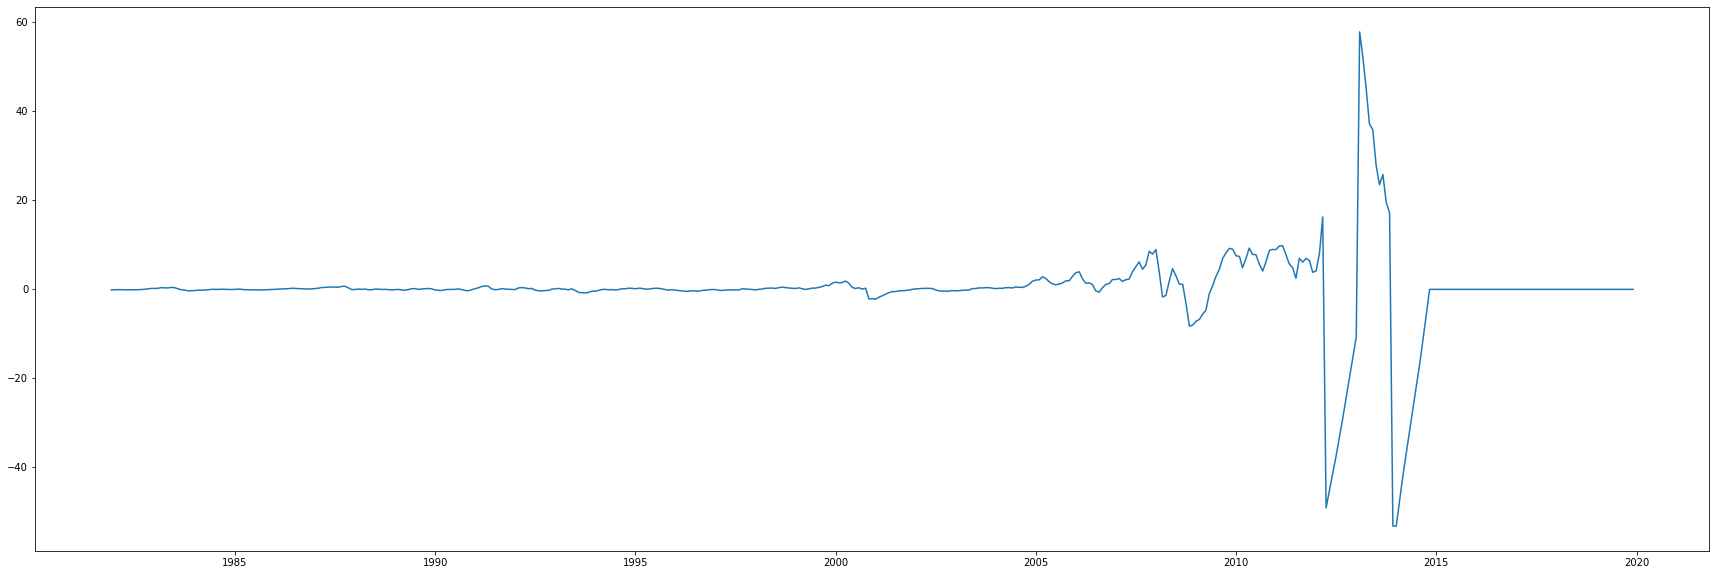

In [438]:
plt.figure(figsize=[30,10])
plt.plot(f3['Close']-f3['Close'].rolling(12).mean())

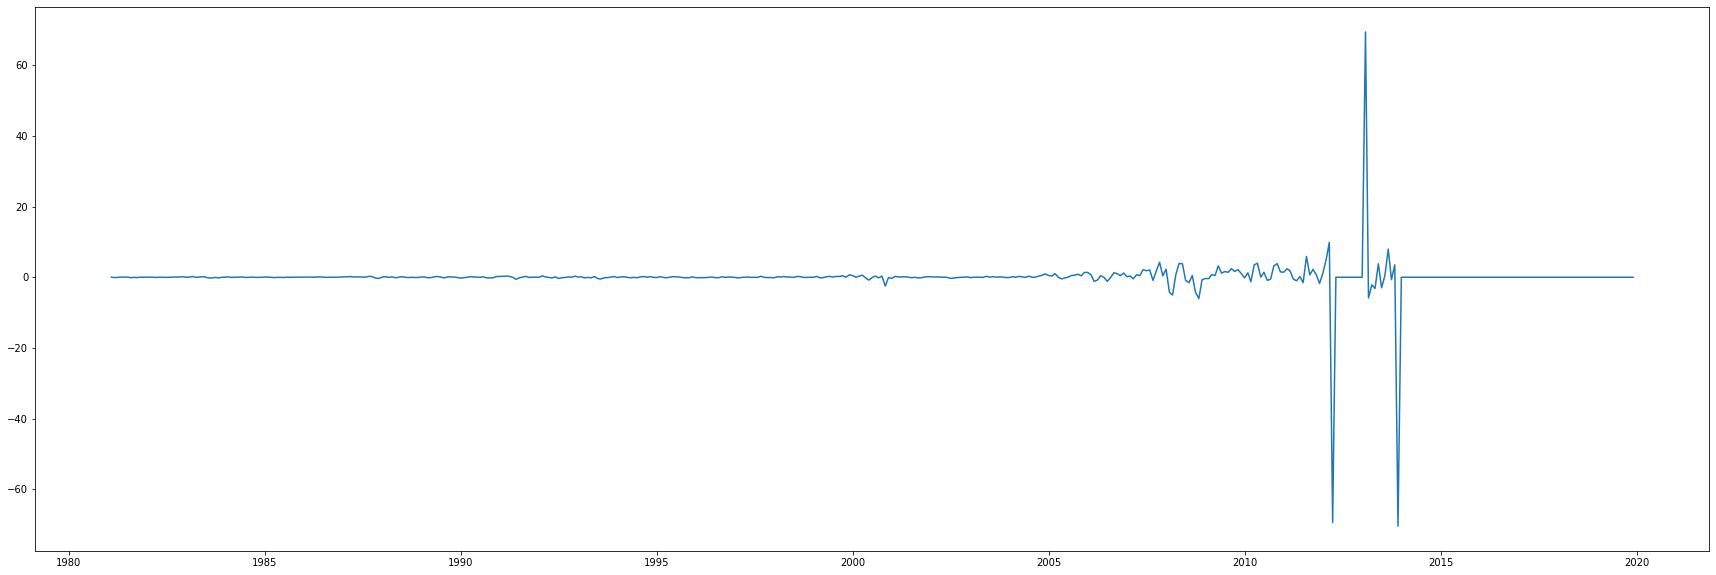

In [439]:
plt.figure(figsize=[30,10])
plt.plot(f3['Close']-f3['Close'].shift(1))

In [440]:
f3['Close']-f3['Close'].shift(1)

Date
1980-12-31         NaN
1981-01-31    0.021651
1981-02-28   -0.093694
1981-03-31   -0.028083
1981-04-30    0.042696
                ...   
2019-07-31    0.000000
2019-08-31    0.000000
2019-09-30    0.000000
2019-10-31    0.000000
2019-11-30    0.000000
Freq: M, Name: Close, Length: 468, dtype: float64

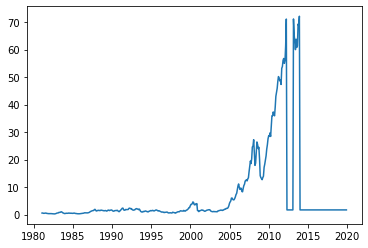

In [441]:
plt.plot(f3['Close'].shift(1))

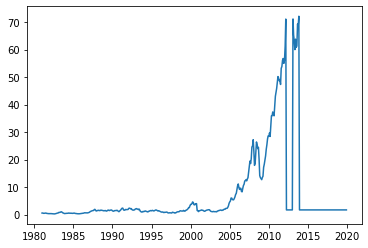

In [442]:
plt.plot(f3['Close'])

In [443]:
f3['Date']= f3.index

In [444]:
# list1= range(0,f2.shape)
range_= [x for x in range(0, f3['Close'].shape[0] )]

In [445]:
f3.shape

(468, 2)

In [446]:
# f3.set_index(range_,inplace=True)

In [447]:
f3.index.shape

(468,)

In [448]:
f3.index= range_

In [449]:
f3

,Close,Date
0,0.543613,1980-12-31
1,0.565264,1981-01-31
2,0.471570,1981-02-28
3,0.443486,1981-03-31
4,0.486182,1981-04-30
...,...,...
463,1.686084,2019-07-31
464,1.686084,2019-08-31
465,1.686084,2019-09-30
466,1.686084,2019-10-31


In [450]:
f3.rename({'Close':'y', 'Date': 'ds'}, axis=1, inplace= True)

In [451]:
f3

,y,ds
0,0.543613,1980-12-31
1,0.565264,1981-01-31
2,0.471570,1981-02-28
3,0.443486,1981-03-31
4,0.486182,1981-04-30
...,...,...
463,1.686084,2019-07-31
464,1.686084,2019-08-31
465,1.686084,2019-09-30
466,1.686084,2019-10-31


In [452]:
model= Prophet()

In [453]:
model.fit(f3)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Asus\anaconda31\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [454]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [455]:
future_dates= model.make_future_dataframe(periods= 24, freq='M')

In [456]:
future_dates

,ds
0,1980-12-31
1,1981-01-31
2,1981-02-28
3,1981-03-31
4,1981-04-30
...,...
487,2021-07-31
488,2021-08-31
489,2021-09-30
490,2021-10-31


In [457]:
f3.head(4)

,y,ds
0,0.543613,1980-12-31
1,0.565264,1981-01-31
2,0.471570,1981-02-28
3,0.443486,1981-03-31


In [458]:
prediction=model.predict(future_dates)

C:\Users\Asus\anaconda31\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Asus\anaconda31\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


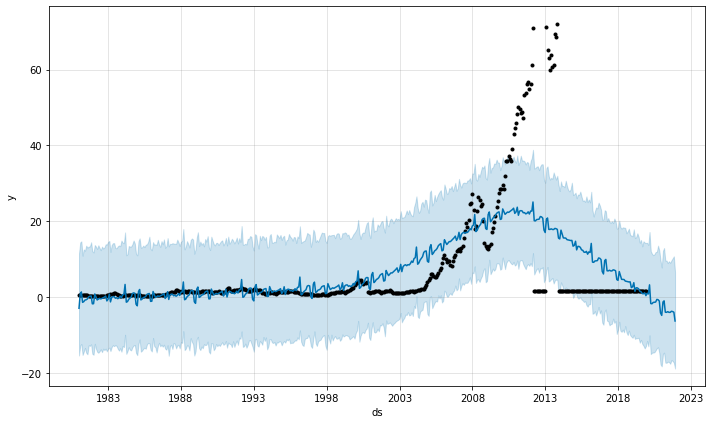

In [459]:
model.plot(prediction)
plt.show()

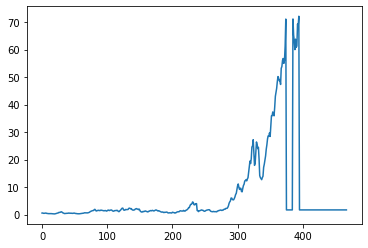

In [460]:
plt.plot(f3['y'])

In [461]:
file.tail()

,Close
Date,
2019-11-19,266.290009
2019-11-20,263.190002
2019-11-21,262.010010
2019-11-22,261.779999
2019-11-25,266.369995


In [462]:
prediction.tail(12)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
480,2020-12-31,-2.107660,-18.258043,7.812843,-2.273804,-1.966595,-2.706247,-2.706247,-2.706247,-2.706247,-2.706247,-2.706247,0.0,0.0,0.0,-4.813907
481,2021-01-31,-2.339416,-14.994093,12.229310,-2.532747,-2.167543,1.055815,1.055815,1.055815,1.055815,1.055815,1.055815,0.0,0.0,0.0,-1.283601
482,2021-02-28,-2.548744,-14.625698,12.960641,-2.765649,-2.351970,1.571445,1.571445,1.571445,1.571445,1.571445,1.571445,0.0,0.0,0.0,-0.977299
483,2021-03-31,-2.780501,-17.271367,9.642934,-3.027584,-2.549156,-1.192081,-1.192081,-1.192081,-1.192081,-1.192081,-1.192081,0.0,0.0,0.0,-3.972581
484,2021-04-30,-3.004781,-17.314197,9.663117,-3.286840,-2.745754,-0.996401,-0.996401,-0.996401,-0.996401,-0.996401,-0.996401,0.0,0.0,0.0,-4.001182
485,2021-05-31,-3.236537,-17.034627,8.980972,-3.561348,-2.949297,-0.593706,-0.593706,-0.593706,-0.593706,-0.593706,-0.593706,0.0,0.0,0.0,-3.830243
486,2021-06-30,-3.460817,-17.076507,9.473729,-3.819424,-3.135282,-0.541799,-0.541799,-0.541799,-0.541799,-0.541799,-0.541799,0.0,0.0,0.0,-4.002616
487,2021-07-31,-3.692573,-17.566392,9.043711,-4.084196,-3.337251,-0.325356,-0.325356,-0.325356,-0.325356,-0.325356,-0.325356,0.0,0.0,0.0,-4.017929
488,2021-08-31,-3.924329,-16.612655,9.683517,-4.349309,-3.536650,0.204842,0.204842,0.204842,0.204842,0.204842,0.204842,0.0,0.0,0.0,-3.719487
489,2021-09-30,-4.148609,-16.804765,10.207808,-4.607784,-3.723222,0.346542,0.346542,0.346542,0.346542,0.346542,0.346542,0.0,0.0,0.0,-3.802068


C:\Users\Asus\anaconda31\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


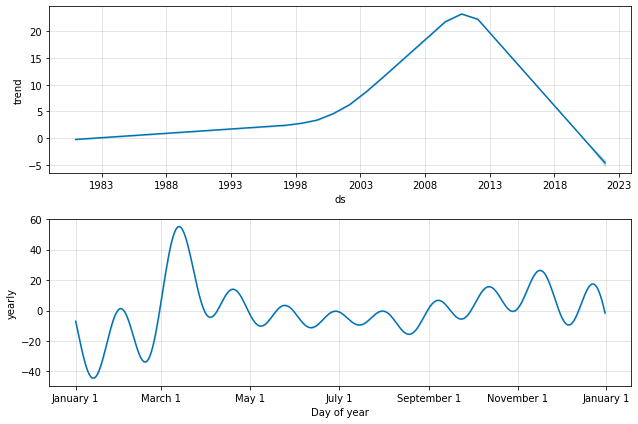

In [463]:
model.plot_components(prediction)
plt.show()

In [464]:
# from fbprophet.diagnostics import cross_validation
# df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
# df_cv.head()

# from fbprophet.diagnostics import performance_metrics
# df_p = performance_metrics(df_cv)
# df_p.head()

# from fbprophet.plot import plot_cross_validation_metric
# fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [465]:
from fbprophet.diagnostics import cross_validation


In [466]:
df_cv=cross_validation(model,horizon='365 days')

INFO:fbprophet:Making 70 forecasts with cutoffs between 1984-06-08 12:00:00 and 2018-11-30 00:00:00


  0%|          | 0/70 [00:00<?, ?it/s]

C:\Users\Asus\anaconda31\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Asus\anaconda31\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Asus\anaconda31\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Asus\anaconda31\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users

In [468]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1980-12-31,-0.227288,-15.385870,11.535438,-0.227288,-0.227288,-2.706247,-2.706247,-2.706247,-2.706247,-2.706247,-2.706247,0.0,0.0,0.0,-2.933534
1,1981-01-31,-0.213537,-12.789225,14.441216,-0.213537,-0.213537,1.055815,1.055815,1.055815,1.055815,1.055815,1.055815,0.0,0.0,0.0,0.842278
2,1981-02-28,-0.201117,-12.350150,14.707024,-0.201117,-0.201117,1.571445,1.571445,1.571445,1.571445,1.571445,1.571445,0.0,0.0,0.0,1.370328
3,1981-03-31,-0.187367,-15.238003,10.918199,-0.187367,-0.187367,-1.192081,-1.192081,-1.192081,-1.192081,-1.192081,-1.192081,0.0,0.0,0.0,-1.379448
4,1981-04-30,-0.174060,-14.374821,12.588735,-0.174060,-0.174060,-0.996401,-0.996401,-0.996401,-0.996401,-0.996401,-0.996401,0.0,0.0,0.0,-1.170461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,2021-07-31,-3.692573,-17.566392,9.043711,-4.084196,-3.337251,-0.325356,-0.325356,-0.325356,-0.325356,-0.325356,-0.325356,0.0,0.0,0.0,-4.017929
488,2021-08-31,-3.924329,-16.612655,9.683517,-4.349309,-3.536650,0.204842,0.204842,0.204842,0.204842,0.204842,0.204842,0.0,0.0,0.0,-3.719487
489,2021-09-30,-4.148609,-16.804765,10.207808,-4.607784,-3.723222,0.346542,0.346542,0.346542,0.346542,0.346542,0.346542,0.0,0.0,0.0,-3.802068
490,2021-10-31,-4.380365,-17.275392,10.765718,-4.877851,-3.910256,0.412886,0.412886,0.412886,0.412886,0.412886,0.412886,0.0,0.0,0.0,-3.967479


In [469]:
df_cv.head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1984-06-30,0.840456,0.637832,1.031176,0.508397,1984-06-08 12:00:00
1,1984-07-31,0.688657,0.484539,0.895415,0.463329,1984-06-08 12:00:00
2,1984-08-31,0.617792,0.411086,0.825517,0.498253,1984-06-08 12:00:00
3,1984-09-30,0.429314,0.240476,0.628562,0.476386,1984-06-08 12:00:00
4,1984-10-31,0.466441,0.262345,0.669594,0.443032,1984-06-08 12:00:00
5,1984-11-30,0.487863,0.291211,0.692773,0.432823,1984-06-08 12:00:00
6,1984-12-31,0.760262,0.544626,0.962514,0.481250,1984-06-08 12:00:00
7,1985-01-31,0.804270,0.600164,1.005749,0.522423,1984-06-08 12:00:00
8,1985-02-28,0.667700,0.466262,0.874788,0.501645,1984-06-08 12:00:00
9,1985-03-31,0.672801,0.472445,0.878039,0.406144,1984-06-08 12:00:00


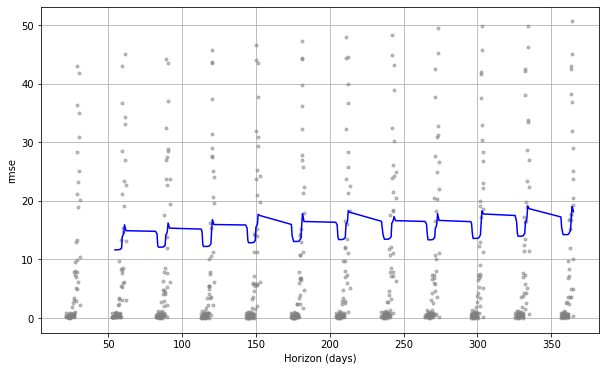

In [470]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [471]:
f2

,Close
Date,
1980-12-31,0.543613
1981-01-31,0.565264
1981-02-28,0.471570
1981-03-31,0.443486
1981-04-30,0.486182
...,...
2019-07-31,205.216364
2019-08-31,204.957728
2019-09-30,217.994999


In [472]:
f3['y']-prediction['yhat'][:468]

0      3.477147
1     -0.277014
2     -0.898758
3      1.822934
4      1.656643
         ...   
463    0.262671
464    0.753197
465    0.789072
466    0.546689
467    1.283247
Length: 468, dtype: float64

In [473]:
f3.columns

Index(['y', 'ds'], dtype='object')

## 

<AxesSubplot:>

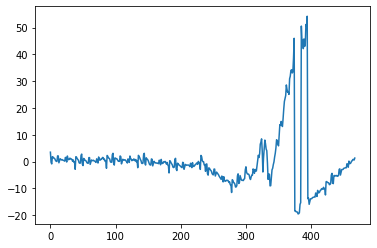

In [474]:
(f3['y']-prediction['yhat'][:468]).plot()

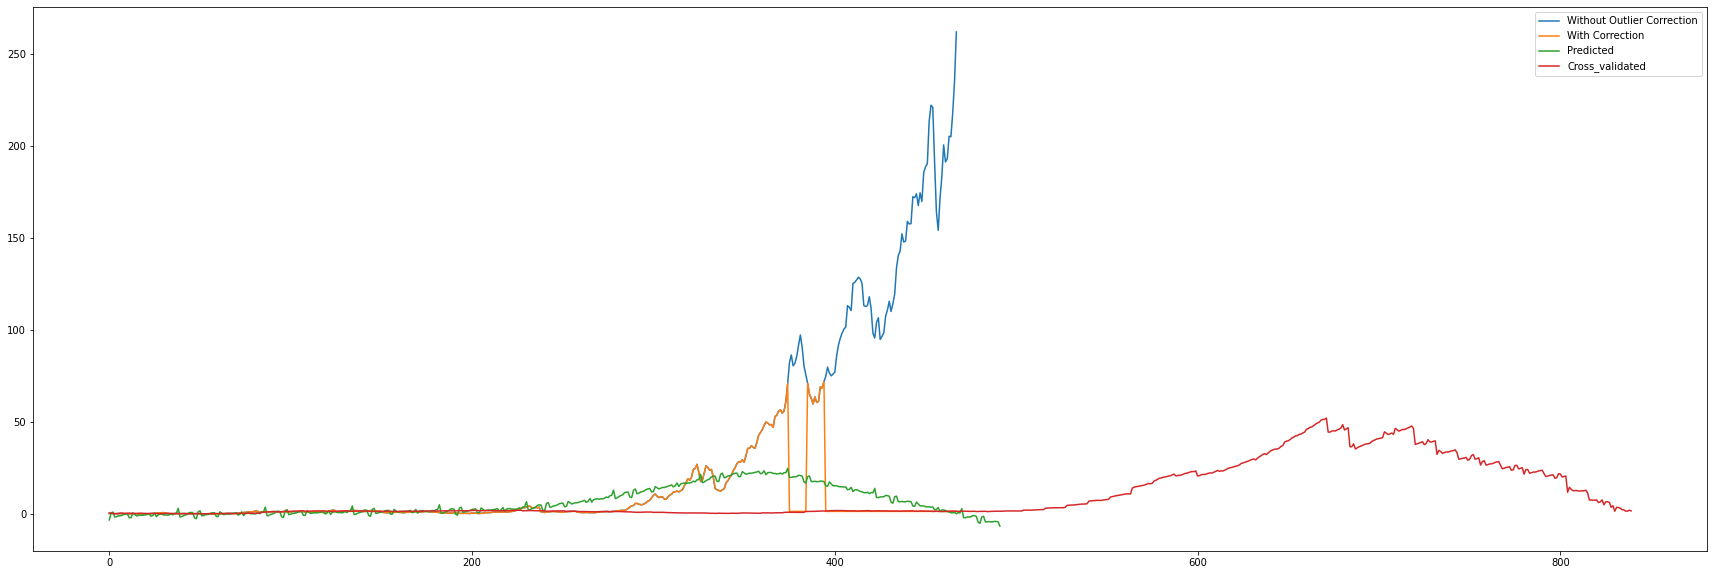

In [475]:
plt.figure(figsize= [30,10])
plt.plot(f2['Close'].values, label="Without Outlier Correction")
plt.plot(f3['y'], label= 'With Correction')
plt.plot(prediction['yhat'], label= 'Predicted')
plt.plot(df_cv['yhat'], label= 'Cross_validated')

plt.legend()

In [ ]:
df_cv.shape

In [ ]:
df_p['mape'].mean()

In [ ]:
df_p